In [1]:
import math 
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 0. Data Exploration

In [2]:
dateparser = lambda x: datetime.strptime(x, '%d/%m/%Y %H:%M')
df = pd.read_csv("./data/KPIs sample 5 cells data_train.csv",
                 delimiter=";",
                 parse_dates=['index'],
                 date_parser=dateparser,
                 converters={"cell_id":str},
                 #index_col="index"
                 )
df.head()

,index,cell_id,DL_TRAFFIC_VOLUME,UL_TRAFFIC_VOLUME,Inter_X2_based_HO_prep,PDCP_SDU_Volume_DL,VoLTE_total_traffic,INTRA_FREQ_HO_SR_RATIO,RRC_SR_RATIO,Intra_eNB_HO_SR_total_RATIO,...,E_RAB_QCI1_DR_RATIO,DCR_LTE_RATIO,CSSR_LTE_RATIO,LTE_INTER_ENODEB_HOSR_RATIO,E_UTRAN_Inter_Freq_HO_SR_RATIO,Inter_RAT_HO_SR_GERAN_SRVCC_RATIO,Inter_RAT_Total_HO_SR_RATIO,E_UTRAN_tot_HO_SR_inter_eNB_X2_RATIO,DL_THROUGHPUT_RATIO,E_RAB_DR_RATIO
0,2021-05-09 00:00:00,2.2265366483183206e+17,3.779737e+10,3.947172e+09,15.0,3.779737e+10,4727.0,0.809859,0.992427,0.809859,...,0.000000,0.001761,0.996041,0.400000,0.770642,0.963636,0.963636,0.400000,82.550417,0.001761
1,2021-05-09 01:00:00,2.2265366483183206e+17,3.684898e+10,4.088752e+09,6.0,3.684898e+10,3076.0,0.886792,0.993288,0.886792,...,0.000000,0.002468,0.995465,0.500000,0.842105,1.000000,1.000000,0.500000,80.531811,0.002468
2,2021-05-09 02:00:00,2.2265366483183206e+17,3.292677e+10,5.016897e+09,8.0,3.292677e+10,3501.0,0.938356,0.994664,0.938356,...,0.013889,0.003077,0.996044,0.375000,0.931624,1.000000,0.966667,0.375000,71.885311,0.003077
3,2021-05-09 03:00:00,2.2265366483183206e+17,3.021547e+10,5.139107e+09,9.0,3.021547e+10,2275.0,0.860215,0.994819,0.860215,...,0.000000,0.001721,0.995920,0.777778,0.816901,0.947368,0.947368,0.777778,65.977430,0.001721
4,2021-05-09 04:00:00,2.2265366483183206e+17,3.082176e+10,4.250716e+09,17.0,3.082176e+10,2178.0,0.840426,0.995952,0.840426,...,0.000000,0.002213,0.995628,0.764706,0.794521,1.000000,1.000000,0.764706,67.324805,0.002213


In [3]:
# Check the number of records
df.shape

(8280, 26)

In [4]:
# Check cell_id count
df["cell_id"].value_counts()

3.8447326973958944e+17    1656
7.315874467898523e+16     1656
4.262775046883192e+17     1656
9.10621795573706e+16      1656
2.2265366483183206e+17    1656
Name: cell_id, dtype: int64

## 0.1 Check null value 

In [3]:
def chechNull(df):
    print(df.isnull().sum(axis=0))

chechNull(df)

index                                                         0
cell_id                                                       0
DL_TRAFFIC_VOLUME                                            21
UL_TRAFFIC_VOLUME                                            21
Inter_X2_based_HO_prep                                     3313
PDCP_SDU_Volume_DL                                         3313
VoLTE_total_traffic                                        3313
INTRA_FREQ_HO_SR_RATIO                                       40
RRC_SR_RATIO                                                 28
Intra_eNB_HO_SR_total_RATIO                                3321
E_UTRAN_RRC_Conn_Stp_Failure_due_RRC_timer_expiry_RATIO    3313
CELL_AVAILABILITY_RATIO                                      20
RACH_Stp_Completion_SR_RATIO                               3313
Total_E_UTRAN_RRC_Conn_Stp_SR_RATIO                        3313
Inter_RAT_HO_SR_UTRAN_SRVCC_RATIO                          5595
UL_THROUGHPUT_RATIO                     

## 0.2 Check infinite values

In [4]:
def checkInfinite(df):
    # print out infinite value counts
    print("n_infinite \t feature_name")
    features = list(df.columns)
    features.remove("cell_id")
    for feature in features: 
        n_inf = np.isinf(df[feature]).sum()
        print(str(n_inf) + "\t\t" +feature)

        
# remove "index" and "cell_id"        
checkInfinite(df)

n_infinite 	 feature_name
0		index
0		DL_TRAFFIC_VOLUME
0		UL_TRAFFIC_VOLUME
0		Inter_X2_based_HO_prep
0		PDCP_SDU_Volume_DL
0		VoLTE_total_traffic
0		INTRA_FREQ_HO_SR_RATIO
0		RRC_SR_RATIO
0		Intra_eNB_HO_SR_total_RATIO
0		E_UTRAN_RRC_Conn_Stp_Failure_due_RRC_timer_expiry_RATIO
0		CELL_AVAILABILITY_RATIO
0		RACH_Stp_Completion_SR_RATIO
0		Total_E_UTRAN_RRC_Conn_Stp_SR_RATIO
1		Inter_RAT_HO_SR_UTRAN_SRVCC_RATIO
0		UL_THROUGHPUT_RATIO
0		E_RAB_QCI1_DR_RATIO
0		DCR_LTE_RATIO
0		CSSR_LTE_RATIO
0		LTE_INTER_ENODEB_HOSR_RATIO
0		E_UTRAN_Inter_Freq_HO_SR_RATIO
0		Inter_RAT_HO_SR_GERAN_SRVCC_RATIO
0		Inter_RAT_Total_HO_SR_RATIO
0		E_UTRAN_tot_HO_SR_inter_eNB_X2_RATIO
0		DL_THROUGHPUT_RATIO
0		E_RAB_DR_RATIO


In [5]:
# drop infinity
condition = df["Inter_RAT_HO_SR_UTRAN_SRVCC_RATIO"]==np.inf
df = df.drop(df[condition].index)

**Plot the distribution of each feature**

In [6]:
def get_fig_position(i,n_per_row):
        row = i/n_per_row
        col = i%n_per_row
        return int(row),int(col)
    

def showFeatureDistribution(df_features):
    """
    Input
    @df_features: a dataframe that contains the features to explore 
    """
    feature_names = df_features.columns
    feature_nb = len(feature_names)

    # plot the distribution of each feature
    n_per_row = 4
    n_rows = math.ceil(feature_nb/n_per_row)

    # plot hist
    fig,ax = plt.subplots(n_rows,n_per_row,figsize=[4*n_per_row,5*n_rows])
    for i,name in enumerate(feature_names):
        ix,iy = get_fig_position(i,n_per_row)
        axes = ax[ix][iy]
        feature = df_features[name].dropna()
        #axes.set_title(name)
        #axes.hist(feature)
        sns.distplot(feature,ax=axes)
    plt.show() 

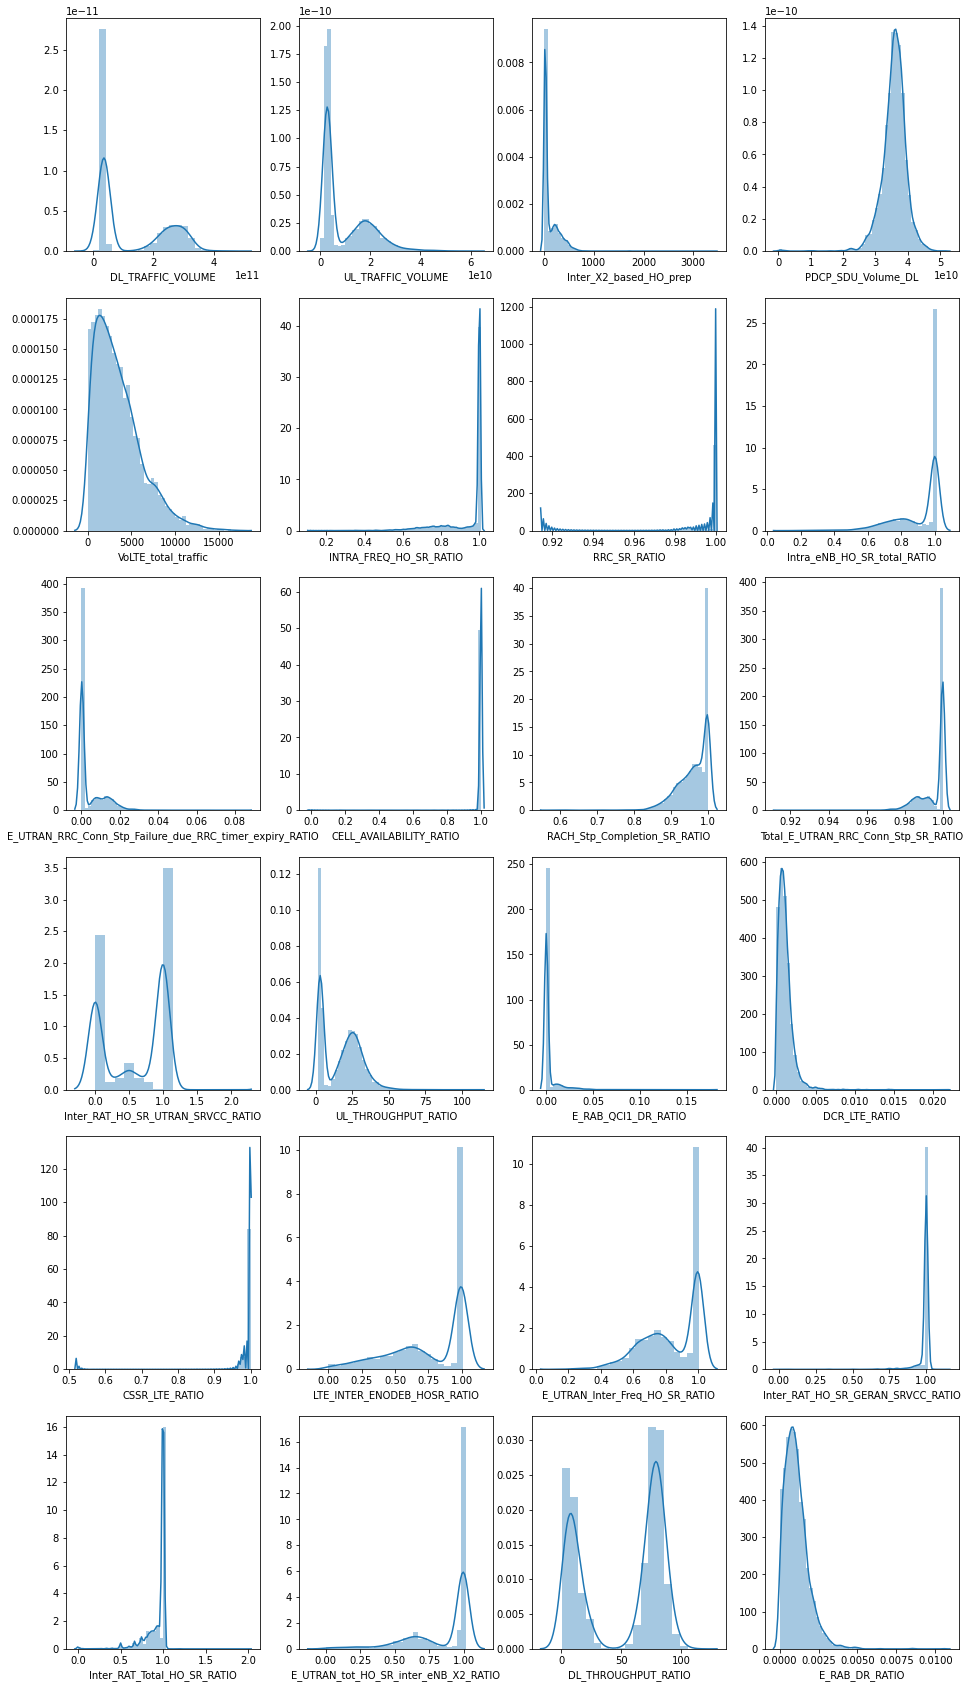

In [7]:
showFeatureDistribution(df.drop(["cell_id",'index'],axis=1))

# 1. Data preprocessing

## 1.1 Add 'HOUR' as a feature

In [7]:
def getHour(x:datetime):
    return int(x.hour)
df["HOUR"] = df['index'].map(getHour)
df[['index','HOUR']]

,index,HOUR
0,2021-05-09 00:00:00,0
1,2021-05-09 01:00:00,1
2,2021-05-09 02:00:00,2
3,2021-05-09 03:00:00,3
4,2021-05-09 04:00:00,4
...,...,...
8275,2021-07-16 19:00:00,19
8276,2021-07-16 20:00:00,20
8277,2021-07-16 21:00:00,21
8278,2021-07-16 22:00:00,22


In [8]:
df["cell"] = LabelEncoder().fit_transform(df['cell_id'])
df["cell"].value_counts()

4    1656
3    1656
2    1656
1    1656
0    1655
Name: cell, dtype: int64

## 1.2 Separate by Cells
Separate data by their cell_id

In [9]:
cell_ids = df["cell_id"].unique()

# A list of dataframe of different cell_id
list_cells = []
for i in range(len(cell_ids)):
    cell_id = cell_ids[i]
    list_cells.append(df[df["cell_id"]==cell_id])

# 2. Feature Selection

## 2.1 Check features with too many missing values

**(1) print out the number of missing value in each cell**

In [10]:
def checkNullOfEach(list_cells):
    for i in range(len(cell_ids)):
        df_cell = list_cells[i].drop("cell_id",axis=1)
        n_feature = len(df_cell.columns)
        print("="*65)
        print(f"Cell Id: {cell_ids[i]}")
        print(f"Number of features:{n_feature},\t Number of data: {len(df_cell)}")
        print("-  "*22)
        chechNull(df_cell)
        print()
        
checkNullOfEach(list_cells)

Cell Id: 2.2265366483183206e+17
Number of features:27,	 Number of data: 1655
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  
index                                                        0
DL_TRAFFIC_VOLUME                                            1
UL_TRAFFIC_VOLUME                                            1
Inter_X2_based_HO_prep                                       1
PDCP_SDU_Volume_DL                                           1
VoLTE_total_traffic                                          1
INTRA_FREQ_HO_SR_RATIO                                       1
RRC_SR_RATIO                                                 1
Intra_eNB_HO_SR_total_RATIO                                  1
E_UTRAN_RRC_Conn_Stp_Failure_due_RRC_timer_expiry_RATIO      1
CELL_AVAILABILITY_RATIO                                      1
RACH_Stp_Completion_SR_RATIO                                 1
Total_E_UTRAN_RRC_Conn_Stp_SR_RATIO                          1
Inter_RAT_HO_SR_UTRAN_SRVCC_RATIO    

**(2) find for each cell the columns that have many missing values**

In [11]:
def nullPercentage(s):
    return s.isnull().sum()/len(s)
    
def uselessColumns(df,threshold=0.7):
    """
    Drop columns with too many nan values
    
    Input:
    @df
    @threshold: The max null values percentage to keep a column.
    """
    sparse_columns = []
    for col in df.columns:
        if nullPercentage(df[col]) >= threshold:
            sparse_columns.append(col)
    return sparse_columns   

In [12]:
dict_sparse_columns = dict()
# Check the useless columns
for df_cell in list_cells:
    cell_id = (df_cell['cell_id'].unique())[0]
    sparse_columns = uselessColumns(df_cell)
    dict_sparse_columns[cell_id] = sparse_columns
    print("="*70)
    print(f'Cell Id: {cell_id}' )
    print(f'{len(sparse_columns)} column(s) with too many missing values:')
    for col in sparse_columns:
        print("\t" + col)

Cell Id: 2.2265366483183206e+17
0 column(s) with too many missing values:
Cell Id: 7.315874467898523e+16
1 column(s) with too many missing values:
	E_UTRAN_Inter_Freq_HO_SR_RATIO
Cell Id: 9.10621795573706e+16
14 column(s) with too many missing values:
	Inter_X2_based_HO_prep
	PDCP_SDU_Volume_DL
	VoLTE_total_traffic
	Intra_eNB_HO_SR_total_RATIO
	E_UTRAN_RRC_Conn_Stp_Failure_due_RRC_timer_expiry_RATIO
	RACH_Stp_Completion_SR_RATIO
	Total_E_UTRAN_RRC_Conn_Stp_SR_RATIO
	Inter_RAT_HO_SR_UTRAN_SRVCC_RATIO
	E_RAB_QCI1_DR_RATIO
	E_UTRAN_Inter_Freq_HO_SR_RATIO
	Inter_RAT_HO_SR_GERAN_SRVCC_RATIO
	Inter_RAT_Total_HO_SR_RATIO
	E_UTRAN_tot_HO_SR_inter_eNB_X2_RATIO
	E_RAB_DR_RATIO
Cell Id: 3.8447326973958944e+17
15 column(s) with too many missing values:
	Inter_X2_based_HO_prep
	PDCP_SDU_Volume_DL
	VoLTE_total_traffic
	Intra_eNB_HO_SR_total_RATIO
	E_UTRAN_RRC_Conn_Stp_Failure_due_RRC_timer_expiry_RATIO
	RACH_Stp_Completion_SR_RATIO
	Total_E_UTRAN_RRC_Conn_Stp_SR_RATIO
	Inter_RAT_HO_SR_UTRAN_SRVCC_RA

In [13]:
# All the columns with too many missing values
sparse_columns_set = set([col for sparse_columns in dict_sparse_columns.values() for col in sparse_columns ])
sparse_columns_set

{'E_RAB_DR_RATIO',
 'E_RAB_QCI1_DR_RATIO',
 'E_UTRAN_Inter_Freq_HO_SR_RATIO',
 'E_UTRAN_RRC_Conn_Stp_Failure_due_RRC_timer_expiry_RATIO',
 'E_UTRAN_tot_HO_SR_inter_eNB_X2_RATIO',
 'Inter_RAT_HO_SR_GERAN_SRVCC_RATIO',
 'Inter_RAT_HO_SR_UTRAN_SRVCC_RATIO',
 'Inter_RAT_Total_HO_SR_RATIO',
 'Inter_X2_based_HO_prep',
 'Intra_eNB_HO_SR_total_RATIO',
 'LTE_INTER_ENODEB_HOSR_RATIO',
 'PDCP_SDU_Volume_DL',
 'RACH_Stp_Completion_SR_RATIO',
 'Total_E_UTRAN_RRC_Conn_Stp_SR_RATIO',
 'VoLTE_total_traffic'}

**(3) check the distribution & correlation of these columns**

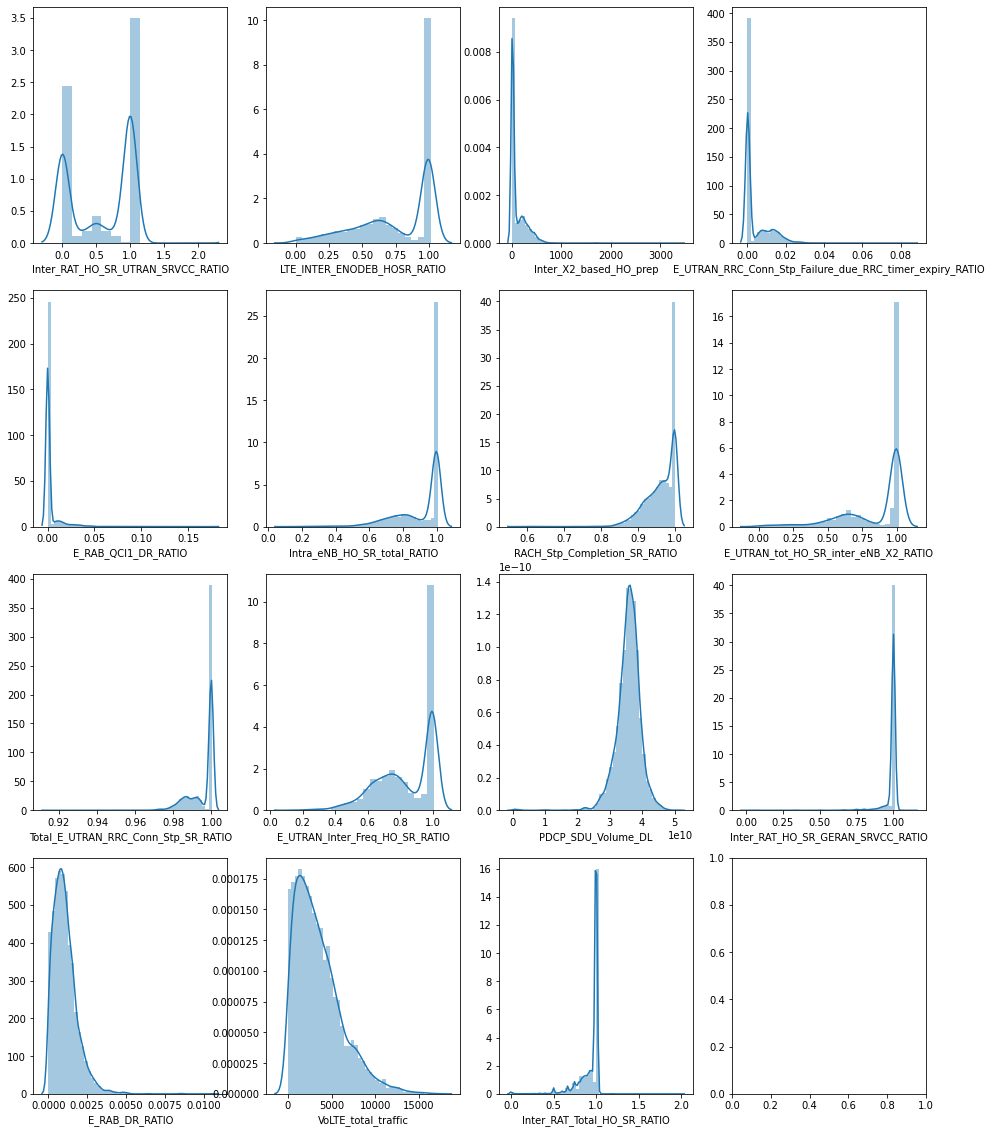

In [14]:
df_sparce = df[sparse_columns_set]
showFeatureDistribution(df_sparce)

<AxesSubplot:>

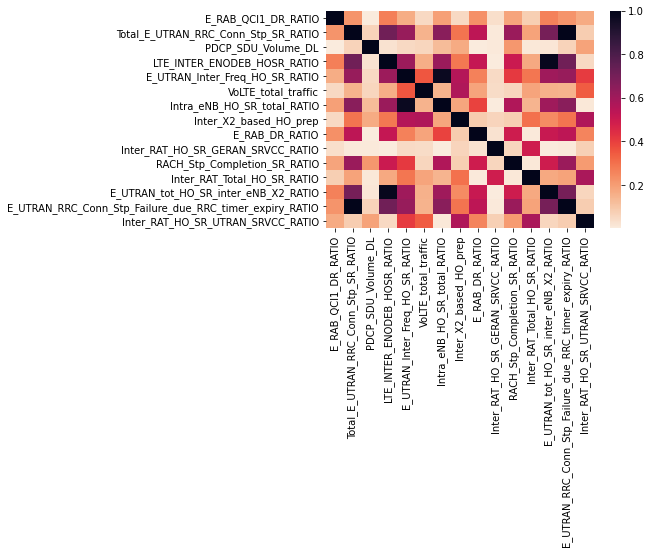

In [26]:
sns.heatmap(abs(df_sparce.corr()),cmap='rocket_r')

关于分布：
- 对于某些分布非常集中的特征（例如‘Inter_RAT_HO_SR_GERAN_SRVCC_RATIO’），用众数填充显然更合适
- 对于方差比较大的特征（例如‘VoLTE_total_traffic’），用均值填充可能更合适

另外，如果仔细查看每个cell中数值的不同分布，我们可以发现，某些特征在不同的cell中有着完全不同的分布（例如'VoLTE_total_traffic'），这时更好的方法是：
- 添加cell_id作为特征
- 根据特征的物理意义处理选择特定数值(0 或 1)

## 2.2 Find highly correlated features

In [15]:
def findHighlyRelevantFeatures(df,threshold=0.7):
    features = list(df.columns)
    features.remove('index')
    features.remove('cell_id')
    df_corr = df.corr()
    
    highCorr = collections.defaultdict(list)

    n = len(features)
    for i in range(n):
        for j in range(i+1,n):
            if abs(df_corr.loc[features[i],features[j]]) >= threshold:
                highCorr[features[i]].append(features[j])
    
    redundCols = list(highCorr.values())
    redundCols = set([item for sublist in redundCols for item in sublist])
    
    return redundCols

In [16]:
dict_redundant_columns = dict()
# Check the highly correlated columns
for df_cell in list_cells:
    cell_id = (df_cell['cell_id'].unique())[0]
    redundant_columns = findHighlyRelevantFeatures(df_cell)
    dict_redundant_columns[cell_id] = redundant_columns
    print("="*70)
    print(f'Cell Id: {cell_id}' )
    print(f'{len(redundant_columns)} redundant column(s) :')
    for col in redundant_columns:
        print("\t" + col)

Cell Id: 2.2265366483183206e+17
10 redundant column(s) :
	UL_THROUGHPUT_RATIO
	DL_THROUGHPUT_RATIO
	E_UTRAN_RRC_Conn_Stp_Failure_due_RRC_timer_expiry_RATIO
	Intra_eNB_HO_SR_total_RATIO
	E_UTRAN_tot_HO_SR_inter_eNB_X2_RATIO
	Total_E_UTRAN_RRC_Conn_Stp_SR_RATIO
	E_UTRAN_Inter_Freq_HO_SR_RATIO
	PDCP_SDU_Volume_DL
	E_RAB_DR_RATIO
	Inter_RAT_Total_HO_SR_RATIO
Cell Id: 7.315874467898523e+16
9 redundant column(s) :
	UL_THROUGHPUT_RATIO
	DL_THROUGHPUT_RATIO
	E_UTRAN_RRC_Conn_Stp_Failure_due_RRC_timer_expiry_RATIO
	Intra_eNB_HO_SR_total_RATIO
	E_UTRAN_tot_HO_SR_inter_eNB_X2_RATIO
	Total_E_UTRAN_RRC_Conn_Stp_SR_RATIO
	PDCP_SDU_Volume_DL
	E_RAB_DR_RATIO
	Inter_RAT_Total_HO_SR_RATIO
Cell Id: 9.10621795573706e+16
16 redundant column(s) :
	UL_THROUGHPUT_RATIO
	RRC_SR_RATIO
	LTE_INTER_ENODEB_HOSR_RATIO
	DCR_LTE_RATIO
	DL_THROUGHPUT_RATIO
	HOUR
	Inter_X2_based_HO_prep
	E_UTRAN_RRC_Conn_Stp_Failure_due_RRC_timer_expiry_RATIO
	Intra_eNB_HO_SR_total_RATIO
	RACH_Stp_Completion_SR_RATIO
	INTRA_FREQ_HO_SR_R

可以看出，对于每个cell，它们中的特征的相关程度都不一样

## 2.3 Compare the result above

In [17]:
def resumePendingColumns(df):
    """
    INPUT
    @df: the original dataframe
    
    OUTPUT
    @df_vide_redund : combination of `df_vide` and `df_redund`
    @df_vide  : data about if a column contains too many missing values for each cell (1 means true)
    @df_redund: data about if a column is redund for each cell (1 means true)
    """
    cell_ids = df["cell_id"].unique()
    
    cell_index = []
    cell_vide_index = []
    cell_redund_index = []
    for cell_id in cell_ids:
        cell_vide_index.append(str(cell_id)+" vide")
        cell_redund_index.append(str(cell_id)+" redund")
    cell_index = cell_vide_index.copy().extend(cell_redund_index)

    # create a data frame to store data
    df_vide_redund = pd.DataFrame(index=df.columns,columns=cell_index)

    # fill data
    for cell, features in dict_sparse_columns.items():
        cell = str(cell)+" vide"
        df_vide_redund.loc[features,cell] = 1
    for cell, features in dict_redundant_columns.items():
        cell = str(cell)+" redund"
        df_vide_redund.loc[features,cell] = 1

    df_vide   = df_vide_redund[cell_vide_index]
    df_redund = df_vide_redund[cell_redund_index]
    
    return df_vide_redund, df_vide, df_redund


df_vide_redund, df_vide, df_redund = resumePendingColumns(df)

In [18]:
df_vide_redund

,2.2265366483183206e+17 vide,7.315874467898523e+16 vide,9.10621795573706e+16 vide,3.8447326973958944e+17 vide,4.262775046883192e+17 vide,2.2265366483183206e+17 redund,7.315874467898523e+16 redund,9.10621795573706e+16 redund,3.8447326973958944e+17 redund,4.262775046883192e+17 redund
index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cell_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DL_TRAFFIC_VOLUME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UL_TRAFFIC_VOLUME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inter_X2_based_HO_prep,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN
PDCP_SDU_Volume_DL,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0
VoLTE_total_traffic,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN
INTRA_FREQ_HO_SR_RATIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
RRC_SR_RATIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Intra_eNB_HO_SR_total_RATIO,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0


In [19]:
# If a column contains too many missing values for each cell (1 means yes)
df_vide

,2.2265366483183206e+17 vide,7.315874467898523e+16 vide,9.10621795573706e+16 vide,3.8447326973958944e+17 vide,4.262775046883192e+17 vide
index,NaN,NaN,NaN,NaN,NaN
cell_id,NaN,NaN,NaN,NaN,NaN
DL_TRAFFIC_VOLUME,NaN,NaN,NaN,NaN,NaN
UL_TRAFFIC_VOLUME,NaN,NaN,NaN,NaN,NaN
Inter_X2_based_HO_prep,NaN,NaN,1.0,1.0,NaN
PDCP_SDU_Volume_DL,NaN,NaN,1.0,1.0,NaN
VoLTE_total_traffic,NaN,NaN,1.0,1.0,NaN
INTRA_FREQ_HO_SR_RATIO,NaN,NaN,NaN,NaN,NaN
RRC_SR_RATIO,NaN,NaN,NaN,NaN,NaN
Intra_eNB_HO_SR_total_RATIO,NaN,NaN,1.0,1.0,NaN


In [20]:
# If a column is redund for each cell (1 means yes)
df_redund

,2.2265366483183206e+17 redund,7.315874467898523e+16 redund,9.10621795573706e+16 redund,3.8447326973958944e+17 redund,4.262775046883192e+17 redund
index,NaN,NaN,NaN,NaN,NaN
cell_id,NaN,NaN,NaN,NaN,NaN
DL_TRAFFIC_VOLUME,NaN,NaN,NaN,NaN,NaN
UL_TRAFFIC_VOLUME,NaN,NaN,NaN,NaN,NaN
Inter_X2_based_HO_prep,NaN,NaN,1.0,NaN,NaN
PDCP_SDU_Volume_DL,1.0,1.0,1.0,NaN,1.0
VoLTE_total_traffic,NaN,NaN,1.0,NaN,NaN
INTRA_FREQ_HO_SR_RATIO,NaN,NaN,1.0,NaN,NaN
RRC_SR_RATIO,NaN,NaN,1.0,NaN,NaN
Intra_eNB_HO_SR_total_RATIO,1.0,1.0,1.0,NaN,1.0


可以看出，尽管每个cell的数据中，特征之间的相关性不尽相同，但是有些特征对大部分cell都是冗余的，我们可以删除它们

## 2.4 Determine different method for filling NaN values

**(1) Redundant columns to drop**

In [18]:
drop_redundant_cols = df_redund[df_redund.sum(axis=1)>=4].index
drop_redundant_cols

Index(['PDCP_SDU_Volume_DL', 'Intra_eNB_HO_SR_total_RATIO',
       'E_UTRAN_RRC_Conn_Stp_Failure_due_RRC_timer_expiry_RATIO',
       'Total_E_UTRAN_RRC_Conn_Stp_SR_RATIO', 'UL_THROUGHPUT_RATIO',
       'DL_THROUGHPUT_RATIO'],
      dtype='object')

**(2) Vide columns to fill**

In [19]:
sparse_columns_set -= set(drop_redundant_cols)
sparse_columns_set

{'E_RAB_DR_RATIO',
 'E_RAB_QCI1_DR_RATIO',
 'E_UTRAN_Inter_Freq_HO_SR_RATIO',
 'E_UTRAN_tot_HO_SR_inter_eNB_X2_RATIO',
 'Inter_RAT_HO_SR_GERAN_SRVCC_RATIO',
 'Inter_RAT_HO_SR_UTRAN_SRVCC_RATIO',
 'Inter_RAT_Total_HO_SR_RATIO',
 'Inter_X2_based_HO_prep',
 'LTE_INTER_ENODEB_HOSR_RATIO',
 'RACH_Stp_Completion_SR_RATIO',
 'VoLTE_total_traffic'}

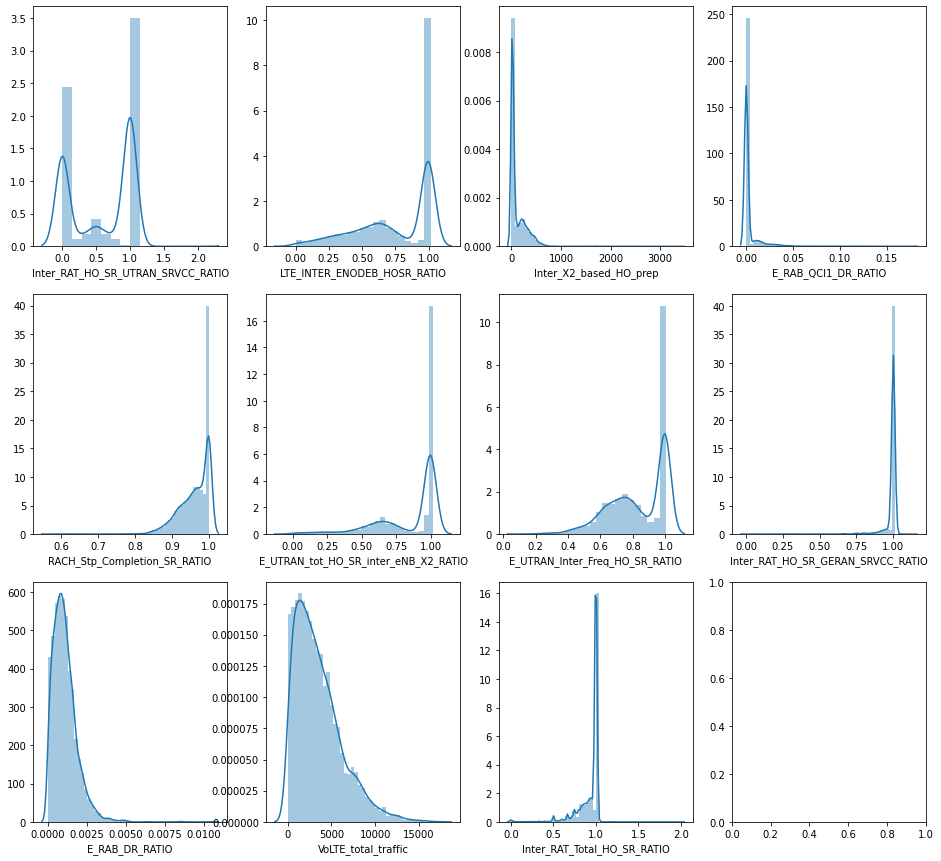

In [20]:
showFeatureDistribution(df[sparse_columns_set])

In [21]:
fill_mode_cols   = ["E_RAB_QCI1_DR_RATIO","Inter_RAT_HO_SR_GERAN_SRVCC_RATIO","Inter_RAT_Total_HO_SR_RATIO"]
fill_mean_cols   = ["VoLTE_total_traffic","Inter_X2_based_HO_prep","E_RAB_DR_RATIO","Inter_RAT_HO_SR_UTRAN_SRVCC_RATIO"]
fill_median_cols = ["LTE_INTER_ENODEB_HOSR_RATIO","E_UTRAN_Inter_Freq_HO_SR_RATIO","RACH_Stp_Completion_SR_RATIO","E_UTRAN_tot_HO_SR_inter_eNB_X2_RATIO"]

# 3.Fill Null values

In [22]:
df.drop(drop_redundant_cols,axis=1,inplace=True)

In [23]:
df[fill_mode_cols]   = df[fill_mode_cols].fillna(df[fill_mode_cols].dropna().mode().iloc[0])
df[fill_mean_cols]   = df[fill_mean_cols].fillna(df[fill_mean_cols].mean())
df[fill_median_cols] = df[fill_median_cols].fillna(df[fill_median_cols].dropna().median())

In [24]:
# Fill others with mean
df.fillna(df.mean(),inplace=True)

In [25]:
chechNull(df)

index                                   0
cell_id                                 0
DL_TRAFFIC_VOLUME                       0
UL_TRAFFIC_VOLUME                       0
Inter_X2_based_HO_prep                  0
VoLTE_total_traffic                     0
INTRA_FREQ_HO_SR_RATIO                  0
RRC_SR_RATIO                            0
CELL_AVAILABILITY_RATIO                 0
RACH_Stp_Completion_SR_RATIO            0
Inter_RAT_HO_SR_UTRAN_SRVCC_RATIO       0
E_RAB_QCI1_DR_RATIO                     0
DCR_LTE_RATIO                           0
CSSR_LTE_RATIO                          0
LTE_INTER_ENODEB_HOSR_RATIO             0
E_UTRAN_Inter_Freq_HO_SR_RATIO          0
Inter_RAT_HO_SR_GERAN_SRVCC_RATIO       0
Inter_RAT_Total_HO_SR_RATIO             0
E_UTRAN_tot_HO_SR_inter_eNB_X2_RATIO    0
E_RAB_DR_RATIO                          0
HOUR                                    0
cell                                    0
dtype: int64


In [26]:
df.to_csv("data/cleaned_KPIs.csv",index=False)